# Lista 1. 
## Zadanie 6.
<i>Wykonując ćwiczenia numeryczne zbadać zbieżność ciągu iteracji punktu stałego odpowiednich funkcji.</i>

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Wykorzystano następujące twierdzenia i definicje:

### Twierdzenie Lagrange'a
Jeśli dana funkcja $f:\left[a,b\right]\rightarrow\mathbb{R}$ jest
* ciągła w przedziale $\left[a,b\right]$,
* różniczkowalna w przedziale $\left(a,b\right)$
to istnieje takie punkt $c\in\left(a,b\right)$, że:
\begin{equation}
\frac{f\left(b\right)-f\left(a\right)}{b-a}=f'\left(c\right).
\end{equation}

### Odwzorowanie zwężające (warunek Lipschitza)
Niech $\left(X, \rho\right)$ będzie przestrzenią metryczną. Mówimy, że odwzorowanie $\Phi: X \rightarrow X$ jest zwężające (jest kontrakcją), jeśli istnieje stała rzeczywista $k \in \left[0, 1\right)$ taka, że dla dowolnych $x,y \in X$ zachodzi nierówność $\rho\left(\Phi\left(x\right), \Phi\left(y\right)\right) \leq k\rho\left(x, y\right)$.

### Zasada kontrakcji Banacha
Niech $\left(X, \rho\right)$ będzie przestrzenia metryczna zupełną i niech $\Phi: X \rightarrow X$ będzie kontrakcją. Wtedy:
* Odwzorowanie $\Phi$ jest ciagłe.
* Odwzorowanie $\Phi$ ma dokładnie jeden punkt stały $x^* \in X$, tzn., $x^* = \Phi\left(x^*\right)$.
* Ciąg iteracji $x_n+1 = \Phi\left(x_n\right)$, dla każdego $x_0 \in X$, jest zbieżny do $x^*$ gdy $n \rightarrow\infty$.

## Wnioski z twierdzeń i definicji

Jeśli funkcja jest ciągła i różniczkowalna na $\mathbb{R}$. Z tw. Lagrange'a:
\begin{multline}
\exists_{c\in\left(a,b\right)}\frac{f\left(b\right)-f\left(a\right)}{b-a}=f'\left(c\right)
\implies \exists_{c\in\left(a,b\right)}\left|\frac{f\left(b\right)-f\left(a\right)}{b-a}\right|=\left|f'\left(c\right)\right|
\iff \exists_{c\in\left(a,b\right)}\left|f\left(b\right)-f\left(a\right)\right|=\left|f'\left(c\right)\right|\left|b-a\right|.\quad \left(1\right)
\end{multline}

Niech $\left(X, \rho\right)$ będzie przestrzenią metryczną, gdzie dla $a,b\in X$, $\rho\left(a,b\right)=\left|a-b\right|$. 

Funkcja $f$ jest kontrakcją, gdy 
$\left|f\left(a\right)-f\left(b\right)\right|\leq k\left|a-b\right|, \quad k\in\left(0,1\right)$. 

Z $\left(1\right)$ wiadomo, że $\left|f\left(b\right)-f\left(a\right)\right|\leq\max\limits_{c\in\left(a,b\right)}\left|f'\left(c\right)\right|\left|b-a\right|$. 

Zatem, żeby pokazać, że funkcja f jest kontrakcją na przedziale $\left[a,b\right]$, należy wykazać, że 
$\max\limits_{c\in\left(a,b\right)}\left|f'\left(c\right)\right|<1. \quad \left(2\right)$

### -----------------ZADANIE-------------------------

<i>a) $x_0=a, x_{k+1}=\cos x_k$.</i>

Wyznaczono pochodną funkcji $\cos x$:
$$
f'\left(x\right)=-\sin x.
$$

Sprawdzono warunek (2). 

$$
\left|-\sin x\right|<1 \iff x\neq\frac{\pi}{2}+k\pi, \,\,\mathrm{dla} \,\,k\in\mathbb{Z}
$$

Jednak wiadomo, że $x_{k+1}=\cos x_k$, a $\cos x_k \in \left[-1,1\right]$, a $\frac{\pi}{2}+k\pi \notin \left[-1,1\right]$. Zatem odwzorowanie jest kontrakcją, dla $X=\left[-1,1\right]$.

Zatem z zasady kontrakcji Banacha wiadomo, że $f$ ma dokładnie jeden punkt stały $x^* \in \left[-1,1\right]$, tzn., $x^* = f\left(x^*\right)$.
Dzięki temu, aby znaleźć $x^*$ wystarczy znaleźć miejsce zerowe funkcji $g\left(x\right)=x-\cos x$.

Aby znaleźć miejsce zerowe funkcji $g\left(x\right)$, skorzystano z metody bisekcji.

In [2]:
def bis(func, a0, b0, delta):
    if func(a0)*func(b0)>0:
        raise ValueError('nie są spełnione założenia twierdzenia Darbouxa')
    a = [a0]
    b = [b0]
    c = [(a0+b0)/2]
    while abs(b[-1]-a[-1])>=delta:
        if func(a[-1])*func(c[-1])<0:
            a.append(a[-1])
            b.append(c[-1])
        elif func(a[-1])*func(c[-1])>0:
            a.append(c[-1])
            b.append(b[-1])
        c.append((a[-1]+b[-1])/2)
    return c[-1]

In [3]:
def func_cos(x):
    return(x-np.cos(x))

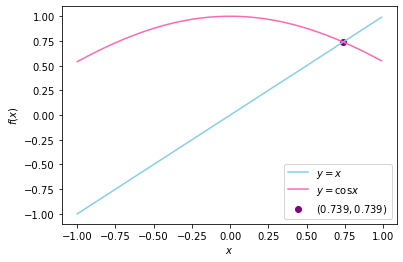

In [4]:
x = np.arange(-1,1,0.01)
y = [np.cos(i) for i in x]
plt.plot(x,x, label='$y=x$', color='skyblue')
plt.plot(x,y, label='$y=\cos x$', color='hotpink')
plt.scatter(0.739,0.739, color='purple', label='$(0.739,0.739)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

In [5]:
bis(func_cos, 0,1,0.001)

0.73876953125

## Otrzymano $x^*\approx 0.739$. 
Porównano z rekurencyjną generacją $x_n$.

In [6]:
def z6a(x0, k):
    if k == 0:
        return x0
    return np.cos(z6a(x0,k-1))

<i>Ćwiczenie wykonać dla: $a=0,$ </i>

Wiadomo, że $x_0=0\in \left[-1,1\right]$. Zatem ciag jest zbieżny do $x^*\approx 0.739$.

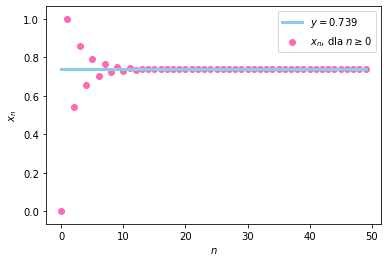

In [7]:
n = 50
a = 0
X = [z6a(a, i) for i in range(n)]
x = range(len(X))
y = [0.739 for i in x]
plt.scatter(x, X, color='hotpink', label='$x_n$, dla $n\geq 0$')
plt.plot(x,y, color='skyblue', linewidth=3, label='$y=0.739$')
plt.xlabel('$n$')
plt.ylabel('$x_n$')
plt.legend()
plt.show()

<i>$a=\pi,$</i>

Wiadomo, że $x_0=\pi$. Wyliczono $x_1 = \cos\pi=-1\in \left[-1,1\right]$. Zatem ciag jest zbieżny do $x^*\approx 0.739$.

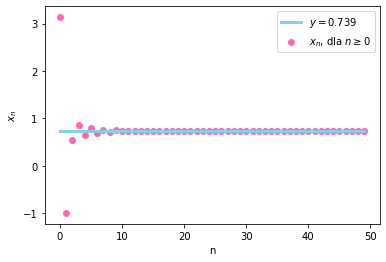

In [8]:
n = 50
a = np.pi
X = [z6a(a, i) for i in range(n)]
x = range(len(X))
y = [0.739 for i in x]
plt.scatter(range(len(X)), X, color='hotpink', label='$x_n$, dla $n\geq 0$')
plt.plot(x,y, color='skyblue', linewidth=3, label='$y=0.739$')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.legend()
plt.show()

<i>$a=\frac{-3}{2}\pi,$</i>

Wiadomo, że $x_0=\frac{-3}{2}\pi$. Wyliczono $x_1 = \cos\frac{-3}{2}\pi=0\in \left[-1,1\right]$. Zatem ciag jest zbieżny do $x^*\approx 0.739$.

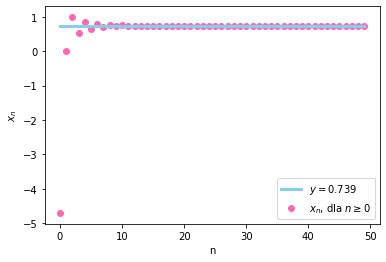

In [9]:
n = 50
a = -3/2*np.pi
X = [z6a(a, i) for i in range(n)]
x = range(len(X))
y = [0.739 for i in x]
plt.scatter(range(len(X)), X, color='hotpink', label='$x_n$, dla $n\geq 0$')
plt.plot(x,y, color='skyblue', linewidth=3, label='$y=0.739$')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.legend()
plt.show()

<i>$a=\frac{3}{2}\pi$.</i>

Wiadomo, że $x_0=\frac{3}{2}\pi$. Wyliczono $x_1 = \cos\frac{3}{2}\pi=0\in \left[-1,1\right]$. Zatem ciag jest zbieżny do $x^*\approx 0.739$.

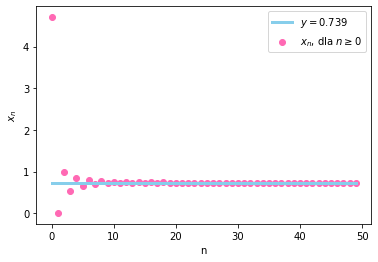

In [10]:
n = 50
a = 3/2*np.pi
X = [z6a(a, i) for i in range(n)]
x = range(len(X))
y = [0.739 for i in x]
plt.scatter(range(len(X)), X, color='hotpink', label='$x_n$, dla $n\geq 0$')
plt.plot(x,y, color='skyblue', linewidth=3, label='$y=0.739$')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.legend()
plt.show()

<i>b) $x_0 = a, x_{k+1} = x_k − (1 + {x_k}^2) \arctan x_k$.</i>

Wyznaczono pochodną funkcji $f\left(x\right)=x − (1 + x^2) \arctan x$:
$$
f'\left(x\right)=1-2x\arctan x-(1+x^2)\frac{1}{1+x^2}=-2x\arctan x
$$

Sprawdzono, kiedy $f'\left(x\right)$ spełnia $\left(2\right)$:

In [11]:
def func_arc(x):
    return abs(-2*x*np.arctan(x))

In [12]:
def func_arc2(x):
    return abs(2*x*np.arctan(x))-1

In [13]:
def func_arc3(x):
    return x-(1+x**2)*np.arctan(x)

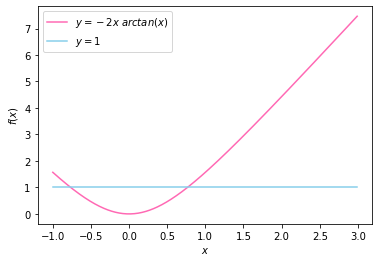

In [14]:
x = np.arange(-1,3,0.01)
y = [func_arc(i) for i in x]
plt.plot(x,y, color='hotpink', label='$y=-2x\,\,arctan(x)$')
plt.plot(x,[1 for i in x], color = 'skyblue', label='$y=1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

In [15]:
print(bis(func_arc2, 0,1,0.0001))
print(bis(func_arc2, -1,0,0.0001))

0.765350341796875
-0.765350341796875


In [16]:
func_arc(0.7654)

1.0000478753861042

In [17]:
func_arc(-0.7654)

1.0000478753861042

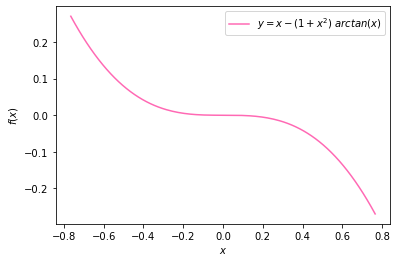

In [18]:
x = np.arange(-0.7654,0.7654,0.01)
y = [func_arc3(i) for i in x]
plt.plot(x,y, color='hotpink', label = '$y=x-(1+x^2)\,\,arctan(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

Zatem funkcja $f$ jest kontrakcją na przedziale $\left(-0.7654, 0.7654\right)$.

Zatem z zasady kontrakcji Banacha wiadomo, że $f$ ma dokładnie jeden punkt stały $x^* \in \left(-0.7654, 0.7654\right)$, tzn., $x^* = f\left(x^*\right)$.
Dzięki temu, aby znaleźć $x^*$ wystarczy znaleźć takie $x$, że $$x=x-(1 + x^2) \arctan x\implies (1 + x^2) \arctan x=0.$$ Można zauważyć, że równanie to jest spełnione dla $x=0$.

$(1 + 0^2) \arctan 0=0$.

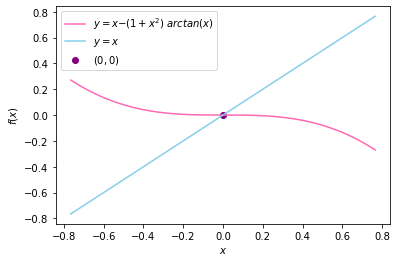

In [19]:
x = np.arange(-0.7654,0.7654,0.01)
y = [func_arc3(i) for i in x]
plt.plot(x,y, label='$y=x−(1+x^2)\,\,arctan(x)$', color='hotpink')
plt.plot(x,x, label='$y=x$', color = 'skyblue')
plt.scatter(0,0,color='purple', label='$(0,0)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

Porównano z rekurencyjną generacją $x_n$.

In [20]:
def z6b(x0, k):
    if k == 0:
        return x0
    return z6b(x0,k-1)-(1+z6b(x0,k-1)**2)*np.arctan(z6b(x0,k-1))

<i>Ćwiczenie wykonać dla: $a=0.5$,</i>

Wiadomo, że $x_0=0.5\in\left(-0.7654, 0.7654\right)$, zatem ciąg jest zbieżny do 0.

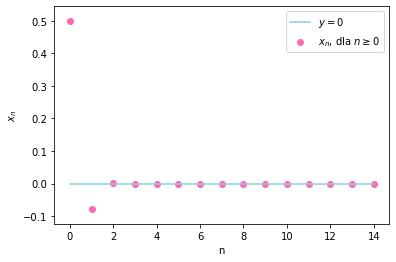

In [21]:
n = 15
a = 0.5
X = [z6b(a, i) for i in range(n)]
x = range(len(X))
y = [0 for i in x]
plt.scatter(range(len(X)), X, color='hotpink', label='$x_n$, dla $n\geq 0$')
plt.plot(x,y, color='skyblue', label='$y=0$')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.legend()
plt.show()

<i>$a=1$</i>

In [22]:
z6b(1, 1)

-0.5707963267948966

Zauważono, że $x_0=1\notin \left(-0,7654, 0,7654\right)$, ale $x_1\approx -0.57\in\left(-0.7654, 0.7654\right)$. Wyjaśnia to przedstawioną poniżej zbieżność ciągu do $0$.

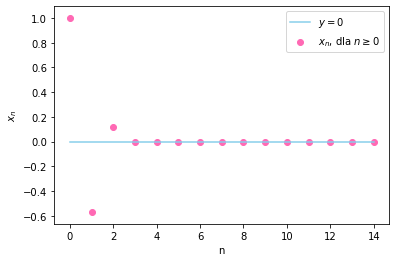

In [23]:
n = 15
a = 1
X = [z6b(a, i) for i in range(n)]
x = range(len(X))
y = [0 for i in x]
plt.scatter(range(len(X)), X, color='hotpink', label='$x_n$, dla $n\geq 0$')
plt.plot(x,y, color='skyblue', label='$y=0$')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.legend()
plt.show()

<i>$a=10$</i>

In [24]:
z6b(10, 1)

-138.5838951046772

Zauważono, że $x_0=10\notin \left(-0,7654, 0,7654\right)$ i moduł każdego kolejnego wyrazu ciągu $x_n$ jest większy od poprzedniego, dlatego ciąg ten jest rozbieżny.

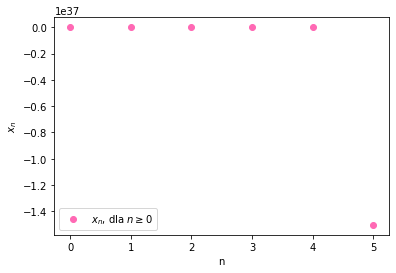

In [25]:
n = 6
a = 10
X = [z6b(a, i) for i in range(n)]
plt.scatter(range(len(X)), X, color='hotpink', label='$x_n$, dla $n\geq 0$')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.legend()
plt.show()

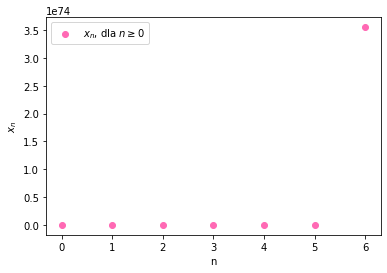

In [26]:
n = 7
a = 10
X = [z6b(a, i) for i in range(n)]
plt.scatter(range(len(X)), X, color='hotpink', label='$x_n$, dla $n\geq 0$')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.legend()
plt.show()

Nagłe wzrosty wartości kolejnych elementów ciągu są spowodowane tym, że we wzorze znajduje się ${x_k}^2$, co sprawia, że dla $a=10$ już $x_1\approx-138.6$. Dla $a\leq1$ nie powodowało to takich skoków, ponieważ, dla $a\in \left(0,1\right), a^2\arctan a$ osiąga małe wartości.